In [1]:
import os
import cv2
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from sklearn.utils import shuffle
from tensorflow.keras.applications import (vgg16,resnet50,mobilenet,inception_v3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/MyDrive/MachineLearning/FERDATASET.zip' FERDATASET.zip
drive.flush_and_unmount()

In [ ]:
!unzip FERDATASET.zip

There are 7 emotions 
1. Angry
2. Disgust
3. Fear
4. Happy
5. Neutral
6. Sad
7. Surprise



In [5]:
from keras import backend as K
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 1

    y_pred = K.clip(y_pred, 0, 1)

    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [14]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential
model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=[fbeta, 'acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    rotation_range=0, 
    width_shift_range=0.0,
    height_shift_range=0.0, 
    horizontal_flip=True,
    vertical_flip=False,
)

val_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_gen.flow_from_directory(
    'train',
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

In [ ]:
test_generator = train_gen.flow_from_directory(
    'test',
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/MusicalMoods/EmotionVgg_model.h5",
    monitor='val_acc',
    save_best_only=True,
    verbose=1,
    period =1,
    mode='auto'
)

early = EarlyStopping(
    monitor='val_acc',
    patience=7,
    verbose=1,
    mode='auto',
    min_delta=0
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    verbose=0,
    mode='auto',
    cooldown=0,
    min_lr=0
)

In [ ]:
hist = model.fit_generator(generator=train_generator,validation_data=test_generator,callbacks=[checkpoint,early,reduce_lr],epochs=20)


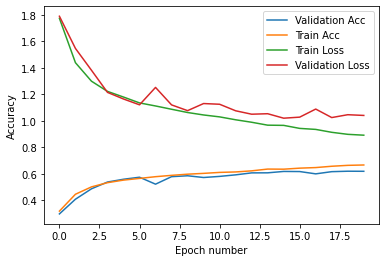

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.legend(["Validation Acc","Train Acc","Train Loss","Validation Loss"])
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint
ckeck_callback = ModelCheckpoint(
    '/content/drive/MyDrive/MachineLearning/Emotionfer_model.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_freq='epoch' 
)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr=ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
    )

In [ ]:
model.save("emotion_prediction_fer.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp 'drive/MyDrive/MachineLearning/Emotionfer_model.h5'  '/content/drive/MyDrive/MachineLearning/.'
